<a href="https://colab.research.google.com/github/yogeshsinghgit/Pwskills_Assignment/blob/main/Na%C3%AFve_bayes_2_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Assignment Link](https://drive.google.com/file/d/1f0h1BGTUUGytf1bPJ5AY4XYU0F75J4vP/view)

[Dataset Link](https://archive.ics.uci.edu/dataset/94/spambase)

Q5, Download Spambase Dataset from UCI Library and implement all variant of Naive Bayes Algorithms on it.
Compare the results and write your findings.

## Import Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

from sklearn.metrics import accuracy_score, classification_report, f1_score

In [5]:
df = pd.read_csv('spambase.data', header=None)

In [9]:
# Assign the column labels
df.columns = [
    'word_freq_make',
    'word_freq_address',
    'word_freq_all',
    'word_freq_3d',
    'word_freq_our',
    'word_freq_over',
    'word_freq_remove',
    'word_freq_internet',
    'word_freq_order',
    'word_freq_mail',
    'word_freq_receive',
    'word_freq_will',
    'word_freq_people',
    'word_freq_report',
    'word_freq_addresses',
    'word_freq_free',
    'word_freq_business',
    'word_freq_email',
    'word_freq_you',
    'word_freq_credit',
    'word_freq_your',
    'word_freq_font',
    'word_freq_000',
    'word_freq_money',
    'word_freq_hp',
    'word_freq_hpl',
    'word_freq_george',
    'word_freq_650',
    'word_freq_lab',
    'word_freq_labs',
    'word_freq_telnet',
    'word_freq_857',
    'word_freq_data',
    'word_freq_415',
    'word_freq_85',
    'word_freq_technology',
    'word_freq_1999',
    'word_freq_parts',
    'word_freq_pm',
    'word_freq_direct',
    'word_freq_cs',
    'word_freq_meeting',
    'word_freq_original',
    'word_freq_project',
    'word_freq_re',
    'word_freq_edu',
    'word_freq_table',
    'word_freq_conference',
    'char_freq_;',
    'char_freq_(',
    'char_freq_[',
    'char_freq_!',
    'char_freq_$',
    'char_freq_#',
    'capital_run_length_average',
    'capital_run_length_longest',
    'capital_run_length_total',
    'spam'
]

In [10]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Basic EDA.

### Check Shape and length of dataset

In [11]:
df.shape

(4601, 58)

### Info.

In [ ]:
df.info()

### Check Null Values

In [13]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

### Check duplicates

In [14]:
df.duplicated().sum()

391

In [15]:
df.drop_duplicates(inplace = True)

In [16]:
df.shape

(4210, 58)

### check Spam/Not Spam Distribution

<Axes: ylabel='spam'>

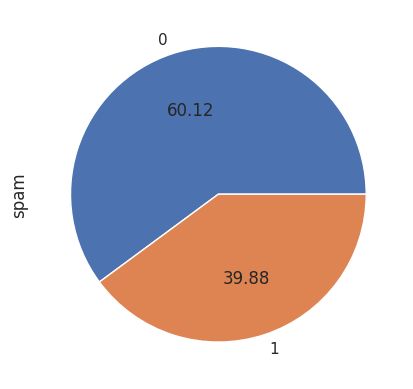

In [18]:
df['spam'].value_counts().plot(kind='pie', autopct = "%0.2f")

## Save and Load the updated CSV

In [21]:
# Save the modified dataframe to a new csv file
df.to_csv('modified_dataset.csv', index=False)

In [22]:
df_new = pd.read_csv('/content/modified_dataset.csv')

## Split the dataset into x and y

In [23]:
# The first 57 columns are features
# The last column has the correct labels (targets)

X, y = df.iloc[:, :57].values, df.iloc[:, 57].values

## Split The data into Train -Test

In [29]:
#  Splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.2)

## Loading the models and tune them

* For GaussianNB: There are no hyperparameters to tune.
* For MultinomialNB: You might tune the alpha parameter.
* For BernoulliNB: You might tune the alpha parameter and binarize threshold.

In [33]:
# Define hyperparameters to tune
param_grid_gnb = {}  # No hyperparameters for GaussianNB
param_grid_mnb = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}  # Alpha parameter for MultinomialNB
param_grid_bnb = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0], 'binarize': [None, 0.0, 0.5, 1.0]}  # Alpha and binarize threshold for BernoulliNB

In [36]:
# Perform hyperparameter tuning
gnb = GridSearchCV(GaussianNB(), param_grid_gnb, cv=10)
mnb = GridSearchCV(MultinomialNB(), param_grid_mnb, cv=10)
bnb = GridSearchCV(BernoulliNB(), param_grid_bnb, cv=10)

models = {'GaussianNB': gnb, 'MultinomialNB': mnb, 'BernoulliNB': bnb}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"Best parameters for {name}: {model.best_params_}")
    print(f"Best score for {name}: {model.best_score_}")

Best parameters for GaussianNB: {}
Best score for GaussianNB: 0.8266046700579341
Best parameters for MultinomialNB: {'alpha': 0.1}
Best score for MultinomialNB: 0.7945474777448072
Best parameters for BernoulliNB: {'alpha': 0.1, 'binarize': 0.5}
Best score for BernoulliNB: 0.8963826480146956


## Generate Report Of All the models.

In [38]:
y_pred_gnb = gnb.predict(X_test)
y_pred_mnb = mnb.predict(X_test)
y_pred_bnb = bnb.predict(X_test)

## Report Of each models

In [40]:
print("Report Of Gaussian Naive Bayes")
print(f"Accuracy Score : {accuracy_score(y_pred_gnb, y_test)}")
print(f"Classification Report \n {classification_report(y_pred_gnb, y_test)}")

Report Of Gaussian Naive Bayes
Accuracy Score : 0.8206650831353919
Classification Report 
               precision    recall  f1-score   support

           0       0.72      0.96      0.83       370
           1       0.96      0.71      0.82       472

    accuracy                           0.82       842
   macro avg       0.84      0.84      0.82       842
weighted avg       0.86      0.82      0.82       842



In [41]:
print("Report Of Multinomial Naive Bayes")
print(f"Accuracy Score : {accuracy_score(y_pred_mnb, y_test)}")
print(f"Classification Report \n {classification_report(y_pred_mnb, y_test)}")

Report Of Multinomial Naive Bayes
Accuracy Score : 0.7707838479809976
Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       530
           1       0.67      0.75      0.71       312

    accuracy                           0.77       842
   macro avg       0.76      0.77      0.76       842
weighted avg       0.78      0.77      0.77       842



In [42]:
print("Report Of Bernoulli Naive Bayes")
print(f"Accuracy Score : {accuracy_score(y_pred_bnb, y_test)}")
print(f"Classification Report \n {classification_report(y_pred_bnb, y_test)}")

Report Of Bernoulli Naive Bayes
Accuracy Score : 0.8978622327790974
Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       479
           1       0.90      0.86      0.88       363

    accuracy                           0.90       842
   macro avg       0.90      0.89      0.90       842
weighted avg       0.90      0.90      0.90       842



## Selecting Best Model

In [43]:
# Evaluate and select the best model
best_model_name = max(models, key=lambda x: models[x].best_score_)
best_model = models[best_model_name]

# Test the selected model
accuracy = best_model.score(X_test, y_test)
print(f"Accuracy of the best model ({best_model_name}): {accuracy}")

Accuracy of the best model (BernoulliNB): 0.8978622327790974


## Comparison of models

The BernoulliNB model preforms better than Multinomial and Gaussian models.

The reason BernoulliNB perfroms better is that, it is designed for binary classification, whereas Gaussian will prefroms best on multiclass data and Multinomial on text data.

## Suggestion and Future work

* The datset has 58 features which are overwhelming if I want to preform any kind of EDA (Plots and charts), so using methods like **PCA**, we can reduce the number for features to lower the load on model.

* We can also Normalize the dataset using minmax scaler, but i believe we can't use standradScalar as it result some negative values which causes problem with multinomial naive bayes algotithm.

# Other Question from assignment

## Q. Can Gaussian Naive Bayes be used for multi-class classification?

Yes, Gaussian Naive Bayes (GNB) can be used for multi-class classification.

While Gaussian Naive Bayes is often used for binary classification tasks, it can also be extended to handle multi-class classification problems. In the case of multi-class classification, GNB applies the Bayes' theorem to calculate the probability of each class given the input features and selects the class with the highest probability as the predicted class.

## Q. How does Bernoulli Naive Bayes handle missing values?


Bernoulli Naive Bayes (BNB) is specifically designed to handle binary data, where features represent binary variables indicating the presence or absence of certain characteristics. As such, missing values in Bernoulli Naive Bayes are typically treated as a separate category or as part of one of the existing categories, depending on how the data is encoded.

**Here are a few common approaches to handling missing values in Bernoulli Naive Bayes:**

1. Imputation
2. Treat missing values as a separate category
3. Ignore Missing Values

## Q. What is the difference between Bernoulli Naive Bayes and Multinomial Naive Bayes?

Bernoulli Naive Bayes (BNB) and Multinomial Naive Bayes (MNB) are two variants of the Naive Bayes algorithm, primarily used for text classification tasks. While they share some similarities, they are designed to handle different types of data and have distinct underlying assumptions:

1. **Type of Data:**
   - **Bernoulli Naive Bayes (BNB):** BNB is suitable for binary feature vectors, where each feature represents a binary variable indicating the presence (1) or absence (0) of a certain term in the document. It's commonly used in document classification tasks where the presence or absence of words in the document is considered.
   - **Multinomial Naive Bayes (MNB):** MNB is designed for multinomially distributed data, typically used for text classification tasks where the features represent counts or frequencies of terms (e.g., word counts in documents). Each feature represents the number of occurrences of a term in the document.

2. **Feature Probability Distribution:**
   - **BNB:** Assumes that features are binary variables following a Bernoulli distribution, where each feature is independent of other features given the class label.
   - **MNB:** Assumes that features represent counts or frequencies following a multinomial distribution, where each feature represents the number of occurrences of a term in the document. It also assumes that features are conditionally independent given the class label.

3. **Handling of Feature Occurrence:**
   - **BNB:** Considers only the presence or absence of features (binary occurrence), ignoring the frequency or count information. It treats each non-zero feature value as 1.
   - **MNB:** Takes into account the frequency or count of features, allowing multiple occurrences of the same term to contribute to the classification decision.

4. **Application:**
   - **BNB:** Commonly used in tasks where binary features are prevalent, such as spam detection, sentiment analysis, or document classification based on the presence or absence of specific words.
   - **MNB:** Widely used in text classification tasks, including document classification, topic classification, and email filtering, where the frequency or count of terms in documents is important for classification.

In summary, the main difference between Bernoulli Naive Bayes and Multinomial Naive Bayes lies in the type of data they are designed to handle (binary features vs. count/frequency features) and the underlying probability distributions assumed for the features.

## Q. A company conducted a survey of its employees and found that 70% of the employees use the company's health insurance plan, while 40% of the employees who use the plan are smokers. What is the probability that an employee is a smoker given that he/she uses the health insurance plan?

To find the probability that an employee is a smoker given that he/she uses the health insurance plan, we can use Bayes' theorem.

Let's define:
- \( P(S) \) as the probability that an employee is a smoker.
- \( P(H) \) as the probability that an employee uses the health insurance plan.
- \( P(S|H) \) as the probability that an employee is a smoker given that he/she uses the health insurance plan.

We are given:
- \( P(H) = 0.70 \) (probability that an employee uses the health insurance plan).
- \( P(S|H) = 0.40 \) (probability that an employee is a smoker given that he/she uses the health insurance plan).

We can calculate \( P(S) \) using the Law of Total Probability, which states that the total probability of an event can be computed by summing the conditional probabilities of that event given all possible outcomes:

\[ P(S) = P(S|H) \times P(H) + P(S|\neg H) \times P(\neg H) \]

Where:
- \( P(S|\neg H) \) is the probability that an employee is a smoker given that he/she does not use the health insurance plan. Since this information is not provided, we'll assume it's independent of health insurance usage and equal to the overall proportion of smokers in the company.
- \( P(\neg H) \) is the probability that an employee does not use the health insurance plan, which is \( 1 - P(H) \).

Let's calculate \( P(S) \):
\[ P(S) = P(S|H) \times P(H) + P(S|\neg H) \times P(\neg H) \]
\[ P(S) = 0.40 \times 0.70 + P(S|\neg H) \times (1 - 0.70) \]

Since we don't have \( P(S|\neg H) \), we'll use the assumption that it's equal to the overall proportion of smokers in the company. Let's denote \( P(S|\neg H) = P(S) \).

\[ P(S) = 0.40 \times 0.70 + P(S) \times (1 - 0.70) \]
\[ P(S) = 0.28 + 0.3P(S) \]
\[ 0.7P(S) = 0.28 \]
\[ P(S) = \frac{0.28}{0.7} \]
\[ P(S) = 0.4 \]

Now, we can use Bayes' theorem to find \( P(S|H) \):
\[ P(S|H) = \frac{P(S) \times P(H|S)}{P(H)} \]
\[ P(S|H) = \frac{0.4 \times 0.40}{0.70} \]
\[ P(S|H) = \frac{0.16}{0.70} \]
\[ P(S|H) ≈ 0.2286 \]

So, the probability that an employee is a smoker given that he/she uses the health insurance plan is approximately \( 0.2286 \) or \( 22.86\% \).